In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set the random seed for reproducibility
np.random.seed(0)

# Define the parameters
n = 4000  # Sample size
d = 800   # Dimension
alpha = d/n # Ratio of d to n

# Number of simulations
num_simulations = 100

# Initialize an array to store the eigenvalues
eigenvalues = np.zeros((num_simulations, d))

In [3]:
# Perform simulations
for i in range(num_simulations):
    # Generate random samples with mean 0 and identity covariance matrix
    X = np.random.multivariate_normal(np.zeros(d), np.eye(d), size=n)
    
    # Compute the sample covariance matrix
    sample_cov = np.cov(X, rowvar=False, bias=True)
    
    # Compute the eigenvalues of the sample covariance matrix
    eigenvalues[i, :] = np.linalg.eigvalsh(sample_cov)

In [4]:
eigenvalues

array([[0.30752195, 0.3119291 , 0.31505475, ..., 2.05478835, 2.06368151,
        2.08064512],
       [0.30177708, 0.3122175 , 0.3156902 , ..., 2.03539553, 2.06422677,
        2.08924565],
       [0.30817277, 0.31624945, 0.31841098, ..., 2.05788162, 2.06513587,
        2.08205518],
       ...,
       [0.30819279, 0.31186469, 0.31410036, ..., 2.04807035, 2.06628644,
        2.0757436 ],
       [0.31465723, 0.31607857, 0.31939763, ..., 2.05454817, 2.06751471,
        2.08768539],
       [0.30403398, 0.31160727, 0.31369635, ..., 2.05377191, 2.06905497,
        2.09789188]])

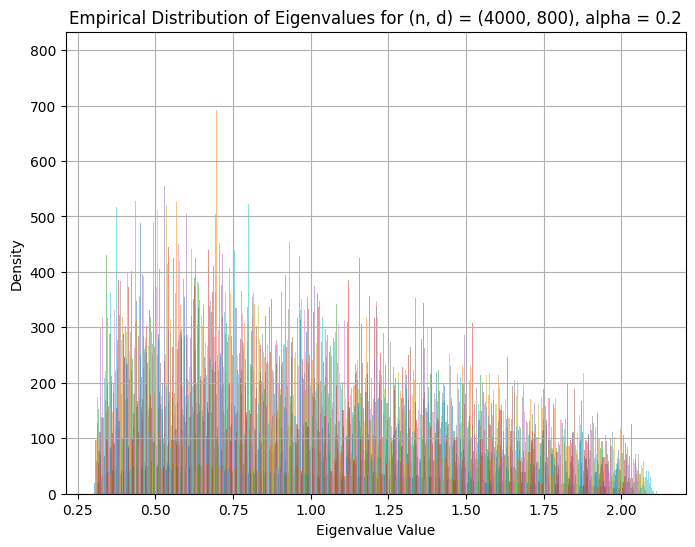

In [5]:
plt.figure(figsize=(8, 6))
for i in range(d):
    plt.hist(eigenvalues[:, i], bins=30, density=True, alpha=0.5)

plt.title(f'Empirical Distribution of Eigenvalues for (n, d) = ({n}, {d}), alpha = {alpha}')
plt.xlabel('Eigenvalue Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### What happen in lower dimension?

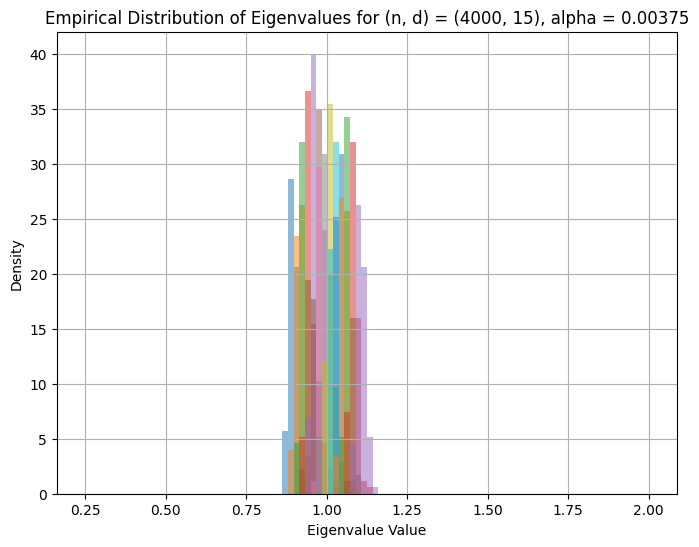

In [9]:
# Set the random seed for reproducibility
np.random.seed(0)

# Define the parameters
n = 4000  # Sample size
d = 15   # Dimension
alpha = d/n # Ratio of d to n

# Number of simulations
num_simulations = 100

# Initialize an array to store the eigenvalues
eigenvalues = np.zeros((num_simulations, d))

# Perform simulations
for i in range(num_simulations):
    # Generate random samples with mean 0 and identity covariance matrix
    X = np.random.multivariate_normal(np.zeros(d), np.eye(d), size=n)
    
    # Compute the sample covariance matrix
    sample_cov = np.cov(X, rowvar=False, bias=True)
    
    # Compute the eigenvalues of the sample covariance matrix
    eigenvalues[i, :] = np.linalg.eigvalsh(sample_cov)

plt.figure(figsize=(8, 6))
for i in range(d):
    plt.hist(eigenvalues[:, i], bins=100, density=True, alpha=0.5, range=(0.25, 2))

plt.title(f'Empirical Distribution of Eigenvalues for (n, d) = ({n}, {d}), alpha = {alpha}')
plt.xlabel('Eigenvalue Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [10]:
def hard_thresholding_cov(X):
    # Step 1: Calculate the sample covariance matrix
    cov_matrix = np.cov(X, rowvar=False)

    # Step 2: Calculate the threshold value
    d = X.shape[1]  # dimension
    n = X.shape[0]  # sample size
    lambda_n = np.sqrt(2 * np.log(d) / n)

    # Step 3: Apply the threshold to the covariance matrix
    cov_matrix[np.abs(cov_matrix) < lambda_n] = 0

    return cov_matrix

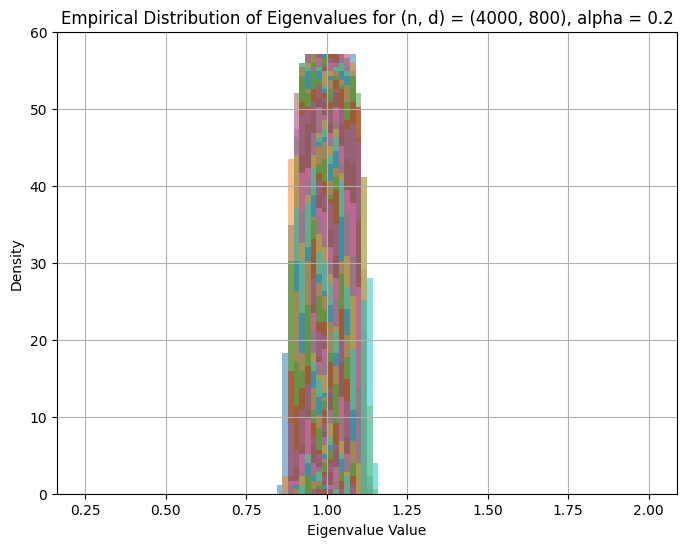

In [13]:
# Set the random seed for reproducibility
np.random.seed(0)

# Define the parameters
n = 4000  # Sample size
d = 800   # Dimension
alpha = d/n # Ratio of d to n

# Number of simulations
num_simulations = 100

# Initialize an array to store the eigenvalues
eigenvalues = np.zeros((num_simulations, d))

# Perform simulations
for i in range(num_simulations):
    # Generate random samples with mean 0 and identity covariance matrix
    X = np.random.multivariate_normal(np.zeros(d), np.eye(d), size=n)
    
    # Compute the sample covariance matrix (hard-thresholded version)
    sample_cov = hard_thresholding_cov(X)
    
    # Compute the eigenvalues of the sample covariance matrix
    eigenvalues[i, :] = np.linalg.eigvalsh(sample_cov)

plt.figure(figsize=(8, 6))
for i in range(d):
    plt.hist(eigenvalues[:, i], bins=100, density=True, alpha=0.5, range=(0.25, 2))

plt.title(f'Empirical Distribution of Eigenvalues for (n, d) = ({n}, {d}), alpha = {alpha}')
plt.xlabel('Eigenvalue Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()